### This Notebook is done for Pixelated Data for 1 Compton, 2 PhotoElectric!
#### I got 83% Accuracy on Test set, 87% for Traning set
##### I am getting X from Blurred Dataset, y as labels from Ground Truth

In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import math

df = {'event_ID_label':[], 'Time1':[], 'Time2':[], 'Theta_P':[], 'Theta_E':[], 
      'E1':[] , 'E2':[], 'DDA':[], 'ID':[]}

with open("3Shrink50BlurredPixelatedFinal.csv", 'r') as f:
    counter = 0
    counter_Theta_E = 0
    for line in f:
        sline = line.split('\t')
#         print(sline, len(sline))
#         print(line, len(line))
        if len(sline) == 9:
            df['event_ID_label'].append(int(sline[0]))
            df['Theta_P'].append(float(sline[1]))
            df['Theta_E'].append(float(sline[2]))
            df['E1'].append(float(sline[3]))
            df['E2'].append(float(sline[4]))     
            df['Time1'].append(float(sline[5]) * 1000000)
            df['Time2'].append(float(sline[6]) * 1000000)
            df['DDA'].append(abs(round(float(sline[1])-float(sline[2]), 5))) # 5 gerd mikone ta 5 ragham
#             df['Class'].append(sline[8][0:-1])
            df['ID'].append(int(sline[7]))
#             df['Label'].append(str(sline[8][0: -1]))
#             if (sline[8][0:-1] == 'correct order'): # sline[] ro az File mikhune! pas mishe Class!, [0:-1]akharesh /n dash, khastim uno pak konim:)
#                 df['Label'].append(1)
#             else:
#                 df['Label'].append(0)
#             if float(sline[1]) >= 90:
#                 counter_Theta_E += 1 # Theta_P: 1922>=90  Theta_E: 1922>=90     
    
            if sline[1] == 'nan':
                counter += 1
#             print(sline[0])
                
#             if sline[7] == '4820':
#                 print('4820 DDA:', sline[6])            
#     print('counter_Theta_E:', counter_Theta_E)

#     print('number of NaN:', counter)
                
df = pd.DataFrame(df)
df.to_csv('Shrink5BinnedBlurredFinalLabeled.csv', index=False)
# df2 = pd.read_csv('ShrinkBigBinnedNoBlurredFinal6.csv')
# df.info() Counts Nan in the dataset
df[0: 10]

# df[['ID']].head()
# type(df[['ID']])
# if df['ID'] == '411391':
#     print('found')
# # else:
# #     print('not found')


,event_ID_label,Time1,Time2,Theta_P,Theta_E,E1,E2,DDA,ID
0,0,219.686621,219.692332,162.818745,16.901285,22.592125,505.817911,145.91746,1499
1,0,219.692332,219.686621,18.721201,180.000000,505.817911,22.592125,161.27880,1499
2,1,229.486509,229.483770,3.944932,36.429739,87.759608,437.174261,32.48481,1574
3,1,229.483770,229.486509,176.104275,180.000000,437.174261,87.759608,3.89573,1574
4,1,1262.914883,1262.905911,136.194355,180.000000,352.910123,90.903514,43.80564,8764
5,1,1262.905911,1262.914883,47.599241,45.297683,90.903514,352.910123,2.30156,8764
6,1,1759.953275,1759.940723,40.383439,44.857911,108.604590,385.660196,4.47447,12255
7,1,1759.940723,1759.953275,146.700013,180.000000,385.660196,108.604590,33.29999,12255
8,1,1998.021220,1998.032199,121.540143,123.437971,294.760735,197.340034,1.89783,13932
9,1,1998.032199,1998.021220,61.734662,72.254124,197.340034,294.760735,10.51946,13932


In [3]:
X = []
y = []
df_gt = pd.read_csv('GroundTruth.csv')
for i in range(0, len(df)-1, 2): # these are from Blurred Data!
    row1 = df.loc[i, 'Theta_P':'Theta_E'].values.tolist()
    row2 = df.loc[i+1, 'Theta_P':'Theta_E'].values.tolist()

    # droup nan rows
    if math.isnan(row1[0]) or math.isnan(row2[0]):
        continue
#     print(row2[0]) # check if you consider every single 2 families properly!
    row1.extend(row2)    
    
    ID = df.loc[i,'ID']  # get family ID from blurred dataframe
    gt_temp_rows = df_gt[df_gt['ID'] == ID] # find corresponding rows in grund truth dataframe
    
    count = 0
    if (len(gt_temp_rows)==0) or(len(gt_temp_rows)==1): # yani exactly we have 2 families!
        count += 1
        continue

    idx = gt_temp_rows.index.tolist()[0] # read the first row's index
    
#     print(len(gt_temp_rows))
#     print(gt_temp_rows.index.tolist())
# #     set the target value
#     print('********************')
#     print('eventID_label:', int(sline[0]))
#     print(gt_temp_rows)
    
    if (gt_temp_rows.loc[idx, 'DDA':'DDA'].item() <= gt_temp_rows.loc[idx+1, 'DDA':'DDA'].item()):
        label = 1
    else:
        label = 0

    X.append(row1)
    y.append(label)

    
X = np.array(X)
y = np.array(y)
# print(y)
y = to_categorical(y, num_classes=None, dtype='float32')
# print(y)



In [4]:
X.shape[1]

4

# Define the Model

In [46]:
# Define the keras model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu')) #8, 8: 58  12, 8:64    32,16: 66   16,16: 67
model.add(Dense(32, activation='relu'))


model.add(Dense(y.shape[1], activation='softmax'))
model.summary()#CNN, LSTM, RNN, Residual, dense

print(model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 2,466
Trainable params: 2,466
Non-trainable params: 0
_________________________________________________________________


In [47]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss: categorical_crossentropy (softmax output vector mide: multi class classification) 
#binary_crossentropy (sigmoid output: binary classification)
#mean_squared_error MSE

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.15)


Train on 2340 samples, validate on 413 samples
Epoch 1/500
2340/2340 [==============================] - 3s 1ms/step - loss: 0.8082 - accuracy: 0.7521 - val_loss: 0.4173 - val_accuracy: 0.7821
Epoch 2/500
2340/2340 [==============================] - 1s 417us/step - loss: 0.4147 - accuracy: 0.7987 - val_loss: 0.4029 - val_accuracy: 0.8087
Epoch 3/500
2340/2340 [==============================] - 1s 321us/step - loss: 0.3992 - accuracy: 0.8068 - val_loss: 0.4256 - val_accuracy: 0.7845
Epoch 4/500
2340/2340 [==============================] - 1s 342us/step - loss: 0.3908 - accuracy: 0.8107 - val_loss: 0.4958 - val_accuracy: 0.7506
Epoch 5/500
2340/2340 [==============================] - 1s 389us/step - loss: 0.3757 - accuracy: 0.8256 - val_loss: 0.3936 - val_accuracy: 0.7966
Epoch 6/500
2340/2340 [==============================] - 1s 341us/step - loss: 0.3898 - accuracy: 0.8107 - val_loss: 0.4625 - val_accuracy: 0.7966
Epoch 7/500
2340/2340 [==============================] - 1s 373us/step -

2340/2340 [==============================] - 1s 310us/step - loss: 0.3172 - accuracy: 0.8581 - val_loss: 0.3609 - val_accuracy: 0.8257
Epoch 110/500
2340/2340 [==============================] - 1s 363us/step - loss: 0.3133 - accuracy: 0.8538 - val_loss: 0.3582 - val_accuracy: 0.8208
Epoch 111/500
2340/2340 [==============================] - 1s 468us/step - loss: 0.3103 - accuracy: 0.8538 - val_loss: 0.3618 - val_accuracy: 0.8160
Epoch 112/500
2340/2340 [==============================] - 1s 451us/step - loss: 0.3098 - accuracy: 0.8504 - val_loss: 0.3714 - val_accuracy: 0.8257
Epoch 113/500
2340/2340 [==============================] - 1s 451us/step - loss: 0.3058 - accuracy: 0.8632 - val_loss: 0.3565 - val_accuracy: 0.8184
Epoch 114/500
2340/2340 [==============================] - 1s 416us/step - loss: 0.3123 - accuracy: 0.8534 - val_loss: 0.3628 - val_accuracy: 0.8257
Epoch 115/500
2340/2340 [==============================] - 1s 489us/step - loss: 0.3091 - accuracy: 0.8590 - val_loss: 0

2340/2340 [==============================] - 1s 433us/step - loss: 0.3054 - accuracy: 0.8624 - val_loss: 0.3541 - val_accuracy: 0.8281
Epoch 165/500
2340/2340 [==============================] - 1s 488us/step - loss: 0.3050 - accuracy: 0.8470 - val_loss: 0.3453 - val_accuracy: 0.8450
Epoch 166/500
2340/2340 [==============================] - 1s 452us/step - loss: 0.3012 - accuracy: 0.8684 - val_loss: 0.3849 - val_accuracy: 0.8232
Epoch 167/500
2340/2340 [==============================] - 1s 462us/step - loss: 0.3020 - accuracy: 0.8581 - val_loss: 0.3667 - val_accuracy: 0.8208
Epoch 168/500
2340/2340 [==============================] - 1s 453us/step - loss: 0.3019 - accuracy: 0.8547 - val_loss: 0.3499 - val_accuracy: 0.8378
Epoch 169/500
2340/2340 [==============================] - 1s 451us/step - loss: 0.2987 - accuracy: 0.8543 - val_loss: 0.3651 - val_accuracy: 0.8281
Epoch 170/500
2340/2340 [==============================] - 1s 345us/step - loss: 0.3117 - accuracy: 0.8577 - val_loss: 0

2340/2340 [==============================] - 1s 475us/step - loss: 0.2928 - accuracy: 0.8573 - val_loss: 0.3718 - val_accuracy: 0.8232
Epoch 220/500
2340/2340 [==============================] - 1s 439us/step - loss: 0.2948 - accuracy: 0.8585 - val_loss: 0.3673 - val_accuracy: 0.8305
Epoch 221/500
2340/2340 [==============================] - 1s 433us/step - loss: 0.2974 - accuracy: 0.8632 - val_loss: 0.3679 - val_accuracy: 0.8329
Epoch 222/500
2340/2340 [==============================] - 1s 468us/step - loss: 0.3034 - accuracy: 0.8577 - val_loss: 0.3689 - val_accuracy: 0.8354
Epoch 223/500
2340/2340 [==============================] - 1s 468us/step - loss: 0.2950 - accuracy: 0.8641 - val_loss: 0.3570 - val_accuracy: 0.8305
Epoch 224/500
2340/2340 [==============================] - 1s 420us/step - loss: 0.2948 - accuracy: 0.8628 - val_loss: 0.3783 - val_accuracy: 0.8305
Epoch 225/500
2340/2340 [==============================] - 1s 305us/step - loss: 0.3014 - accuracy: 0.8590 - val_loss: 0

2340/2340 [==============================] - 1s 437us/step - loss: 0.2928 - accuracy: 0.8641 - val_loss: 0.3756 - val_accuracy: 0.8329
Epoch 275/500
2340/2340 [==============================] - 1s 423us/step - loss: 0.2927 - accuracy: 0.8620 - val_loss: 0.3669 - val_accuracy: 0.8257
Epoch 276/500
2340/2340 [==============================] - 1s 433us/step - loss: 0.2943 - accuracy: 0.8521 - val_loss: 0.3603 - val_accuracy: 0.8354
Epoch 277/500
2340/2340 [==============================] - 1s 495us/step - loss: 0.2925 - accuracy: 0.8654 - val_loss: 0.3654 - val_accuracy: 0.8257
Epoch 278/500
2340/2340 [==============================] - 1s 482us/step - loss: 0.2920 - accuracy: 0.8611 - val_loss: 0.4073 - val_accuracy: 0.7797
Epoch 279/500
2340/2340 [==============================] - 1s 419us/step - loss: 0.2928 - accuracy: 0.8607 - val_loss: 0.3830 - val_accuracy: 0.8232
Epoch 280/500
2340/2340 [==============================] - 1s 309us/step - loss: 0.2948 - accuracy: 0.8654 - val_loss: 0

2340/2340 [==============================] - 1s 356us/step - loss: 0.2945 - accuracy: 0.8650 - val_loss: 0.3526 - val_accuracy: 0.8329
Epoch 330/500
2340/2340 [==============================] - 1s 409us/step - loss: 0.2913 - accuracy: 0.8598 - val_loss: 0.3640 - val_accuracy: 0.8305
Epoch 331/500
2340/2340 [==============================] - 1s 432us/step - loss: 0.2901 - accuracy: 0.8645 - val_loss: 0.3773 - val_accuracy: 0.8281
Epoch 332/500
2340/2340 [==============================] - 1s 421us/step - loss: 0.2954 - accuracy: 0.8603 - val_loss: 0.3744 - val_accuracy: 0.8281
Epoch 333/500
2340/2340 [==============================] - 1s 444us/step - loss: 0.2911 - accuracy: 0.8637 - val_loss: 0.3848 - val_accuracy: 0.8208
Epoch 334/500
2340/2340 [==============================] - 1s 442us/step - loss: 0.2957 - accuracy: 0.8564 - val_loss: 0.3641 - val_accuracy: 0.8208
Epoch 335/500
2340/2340 [==============================] - 1s 425us/step - loss: 0.2926 - accuracy: 0.8641 - val_loss: 0

2340/2340 [==============================] - 1s 305us/step - loss: 0.2868 - accuracy: 0.8709 - val_loss: 0.3694 - val_accuracy: 0.8354
Epoch 385/500
2340/2340 [==============================] - 1s 304us/step - loss: 0.2906 - accuracy: 0.8615 - val_loss: 0.3558 - val_accuracy: 0.8475
Epoch 386/500
2340/2340 [==============================] - 1s 416us/step - loss: 0.2917 - accuracy: 0.8632 - val_loss: 0.3539 - val_accuracy: 0.8402
Epoch 387/500
2340/2340 [==============================] - 1s 473us/step - loss: 0.2919 - accuracy: 0.8645 - val_loss: 0.3670 - val_accuracy: 0.8281
Epoch 388/500
2340/2340 [==============================] - 1s 440us/step - loss: 0.2925 - accuracy: 0.8637 - val_loss: 0.3514 - val_accuracy: 0.8402
Epoch 389/500
2340/2340 [==============================] - 1s 438us/step - loss: 0.2892 - accuracy: 0.8624 - val_loss: 0.3551 - val_accuracy: 0.8402
Epoch 390/500
2340/2340 [==============================] - 1s 461us/step - loss: 0.2904 - accuracy: 0.8611 - val_loss: 0

Epoch 439/500
2340/2340 [==============================] - 1s 432us/step - loss: 0.2892 - accuracy: 0.8632 - val_loss: 0.3985 - val_accuracy: 0.8039
Epoch 440/500
2340/2340 [==============================] - 1s 495us/step - loss: 0.2875 - accuracy: 0.8675 - val_loss: 0.3812 - val_accuracy: 0.8136
Epoch 441/500
2340/2340 [==============================] - 1s 502us/step - loss: 0.2903 - accuracy: 0.8607 - val_loss: 0.3738 - val_accuracy: 0.8257
Epoch 442/500
2340/2340 [==============================] - 1s 549us/step - loss: 0.2909 - accuracy: 0.8615 - val_loss: 0.3566 - val_accuracy: 0.8402
Epoch 443/500
2340/2340 [==============================] - 1s 536us/step - loss: 0.2836 - accuracy: 0.8637 - val_loss: 0.3903 - val_accuracy: 0.8208
Epoch 444/500
2340/2340 [==============================] - 1s 553us/step - loss: 0.2832 - accuracy: 0.8641 - val_loss: 0.3712 - val_accuracy: 0.8426
Epoch 445/500
2340/2340 [==============================] - 1s 374us/step - loss: 0.2894 - accuracy: 0.8628

Epoch 494/500
2340/2340 [==============================] - 1s 508us/step - loss: 0.2885 - accuracy: 0.8624 - val_loss: 0.3756 - val_accuracy: 0.8426
Epoch 495/500
2340/2340 [==============================] - 1s 490us/step - loss: 0.2931 - accuracy: 0.8590 - val_loss: 0.3689 - val_accuracy: 0.8329
Epoch 496/500
2340/2340 [==============================] - 1s 367us/step - loss: 0.2873 - accuracy: 0.8641 - val_loss: 0.3749 - val_accuracy: 0.8378
Epoch 497/500
2340/2340 [==============================] - 1s 318us/step - loss: 0.2863 - accuracy: 0.8662 - val_loss: 0.3758 - val_accuracy: 0.8329
Epoch 498/500
2340/2340 [==============================] - 1s 302us/step - loss: 0.2883 - accuracy: 0.8624 - val_loss: 0.3805 - val_accuracy: 0.8257
Epoch 499/500
2340/2340 [==============================] - 1s 306us/step - loss: 0.2907 - accuracy: 0.8654 - val_loss: 0.3611 - val_accuracy: 0.8305
Epoch 500/500
2340/2340 [==============================] - 1s 336us/step - loss: 0.2810 - accuracy: 0.8662

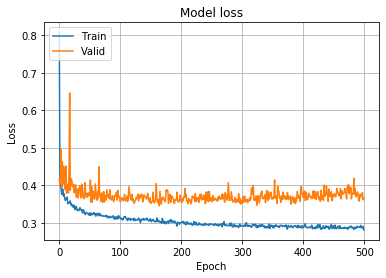

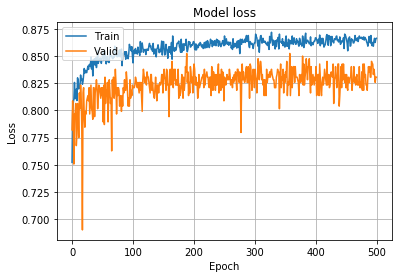

In [50]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()



In [51]:
# Evaluating trained model on test set
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

689/689 [==============================] - 0s 100us/step
Accuracy: 83.02
